Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [74]:
library(tidymodels)



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [75]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [76]:
diabetes_train |> glimpse()



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 10, 3, 8, 1, 13, 5, 5, 10, 11, 3~
$ Glucose                  <dbl> 85, 116, 115, 110, 139, 126, 99, 97, 145, 117~
$ BloodPressure            <dbl> 66, 74, 0, 92, 80, 88, 84, 66, 82, 92, 75, 78~
$ SkinThickness            <dbl> 29, 0, 0, 0, 0, 41, 0, 15, 19, 0, 26, 31, 0, ~
$ Insulin                  <dbl> 0, 0, 0, 0, 0, 235, 0, 140, 110, 0, 0, 0, 0, ~
$ BMI                      <dbl> 26.6, 25.6, 35.3, 37.6, 27.1, 39.3, 35.4, 23.~
$ DiabetesPedigreeFunction <dbl> 0.351, 0.201, 0.134, 0.191, 1.441, 0.704, 0.3~
$ Age                      <dbl> 31, 30, 29, 30, 57, 27, 50, 22, 57, 38, 60, 4~
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

conveniently the data set owner has set "Outcome" to the dependent variable whereas all others are "medical predictors" as independent variables.
Aside from those factors, the binary outcome is what makes it suitable for a logistic regression. 

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

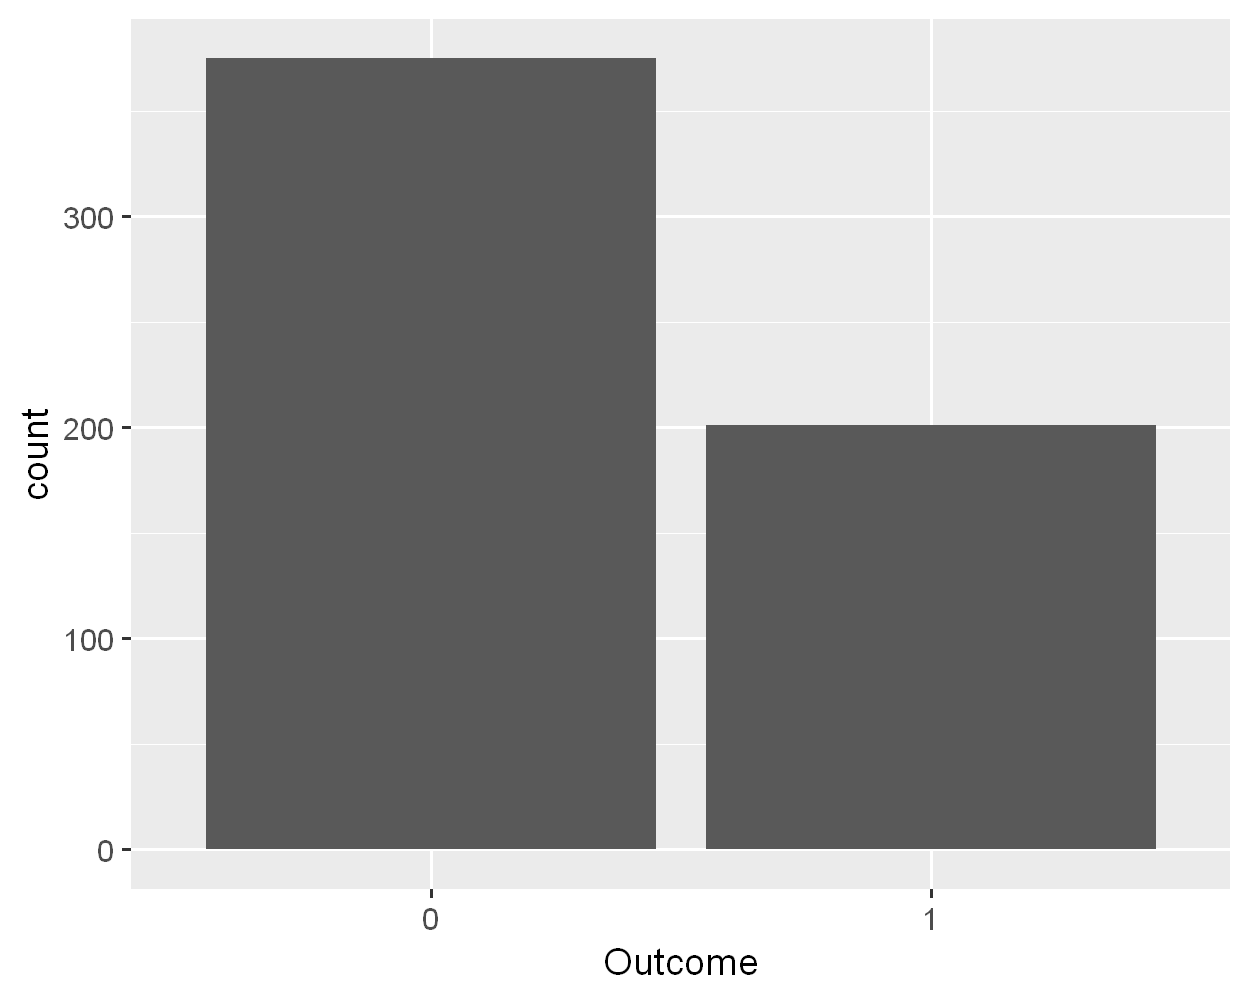

In [77]:
ggplot(diabetes_train) + 
  geom_bar(mapping = aes(x = Outcome), show.legend = FALSE)

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**
No, we do not have equal outcomes. However that is a realistic measure and would seemingly fit the natural distribution of the population evaluated. Less True values are positive in that we can mitigate overfitting.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [78]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

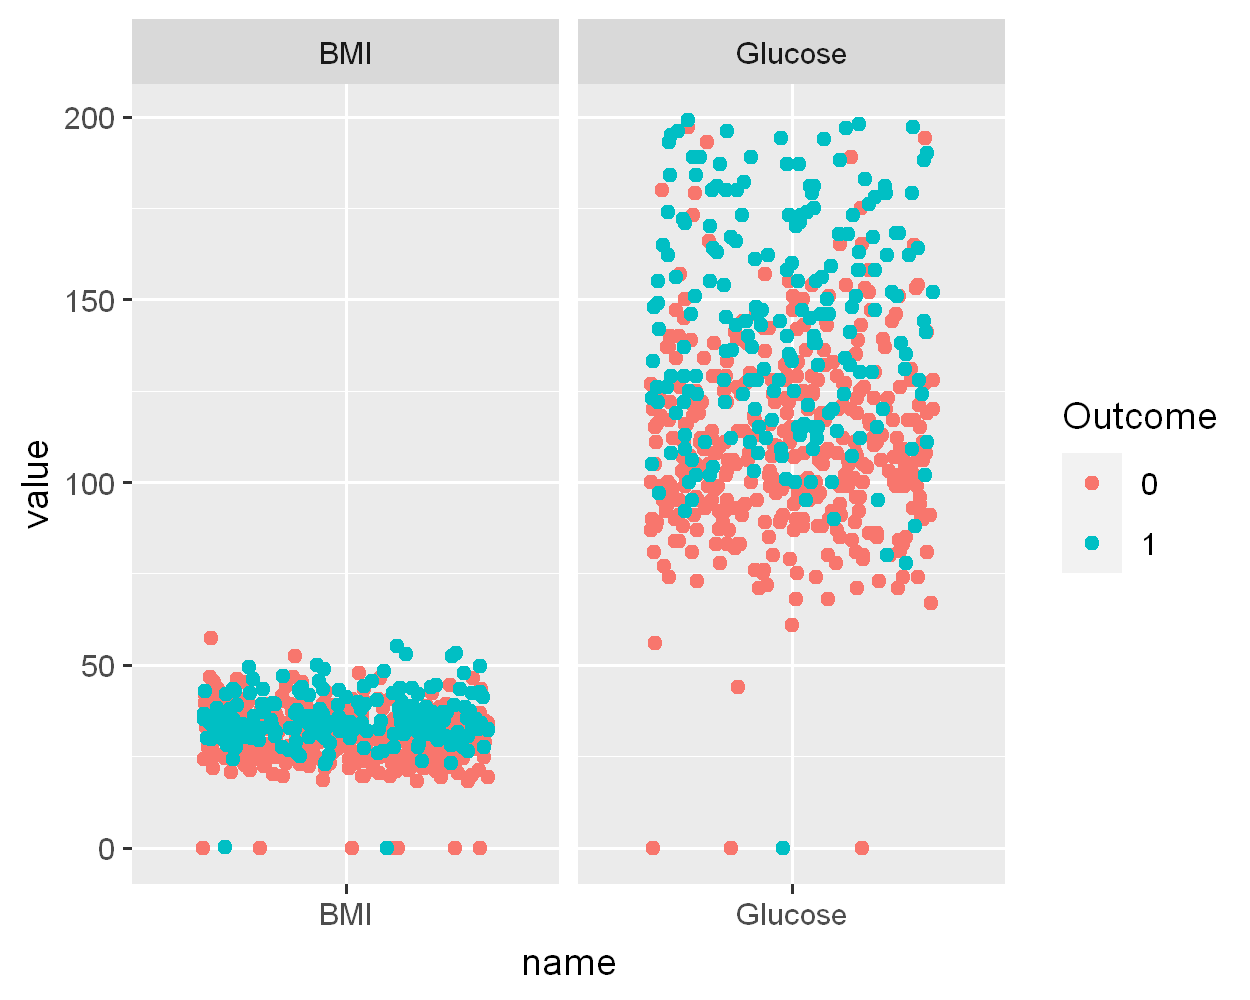

In [79]:
ggplot(plot_df) +
    geom_jitter(mapping = aes(x = name, y = value, color = Outcome)) +
    facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

It includes the total categoricals per facet.

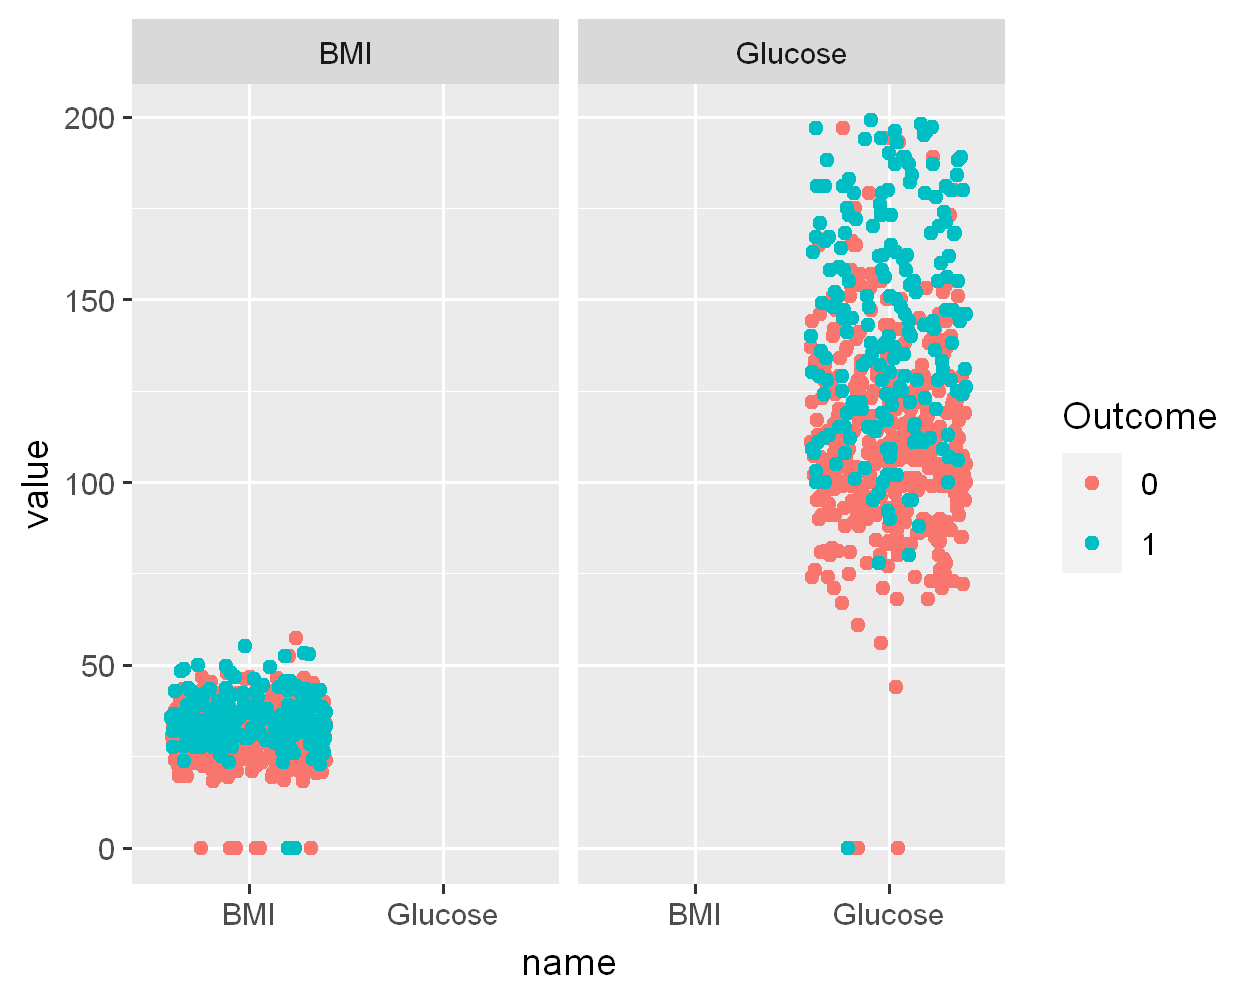

In [80]:
ggplot(plot_df) +
    geom_jitter(mapping = aes(x = name, y = value, color = Outcome)) +
    facet_wrap(~name, ncol = 2)

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [81]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [82]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 113  40
         1  12  27

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

According to the predictions, 42 individuals had diabetes. 

The model correctly predicted 32 of the diabetes outcomes.

10 predictions were false positives

